# Stroke Prediction Model
According to the WHO, stroke is the second killer disease of the world's total deaths.
This disease contributes about 50% of total world deaths. 
This triggers my interest to do this project. 

### My Inspiration
This disease has been on the rise in Africa killing most young people leaving their families in worries. 

### Mission and Vision
This project aims to investigate and build a machine learning model to predict the probability of a person getting stroke disease given certain health records like age, bmi, gender, etc

### The History of the dataset

Because of data ethics, public health privacy policies and poor data collection, I couldn't get real data to do my project. Notwithstanding, I got a synthetic data at kaggle.com and I'm going to use that for my project

In [91]:
# Import the libraries needed for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder

ModuleNotFoundError: No module named 'category_encoders'

In [4]:
# Import the dataset
df = pd.read_csv("Desktop\DS@_22\Datasets\healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Perform Exploratory Data Analysis [EDA] on the dataset

In [8]:
# Looking at the shape of the dataset
df.shape

(5110, 12)

In [6]:
# Looking into the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


It looks like all columns are complete except the 'bmi' column which has a few 'NaN' values

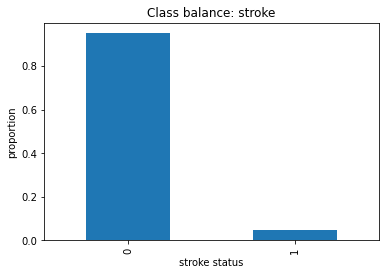

In [75]:
# Plot class balance ['stroke']
df['stroke'].value_counts(normalize = True).plot(kind = 'bar')
plt.xlabel('stroke status')
plt.ylabel('proportion')
plt.title('Class balance: stroke');

It is very obvious that the 'stroke' column is imbalance. And this is a good news since it is only a few that had stroke

In [9]:
# Looking at gender proportion
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

There are more females in the dataset. But pictures always tell a better story than numbers so let's visualize it.

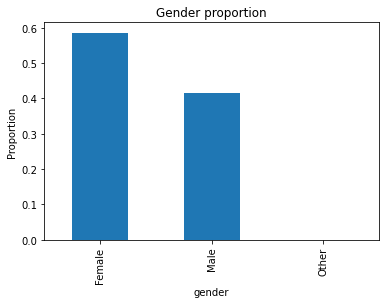

In [14]:
# Proportionally
gender_prop = df['gender'].value_counts(normalize = True).plot(kind = 'bar')
plt.xlabel("gender")
plt.ylabel('Proportion')
plt.title('Gender proportion');

#### Looking into the gender distribution of the patients with 'yes' stroke status

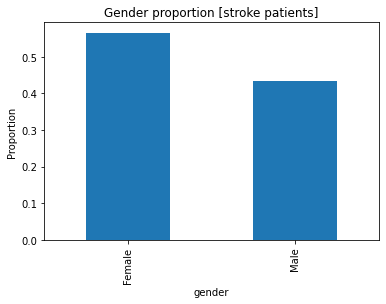

In [45]:
# Subseting the stroke 'yes' patients and looking into the gender distribution
df_y = df[df['stroke'] == 1]
df_y['gender'].value_counts(normalize = True).plot(kind = 'bar')
plt.xlabel("gender")
plt.ylabel('Proportion')
plt.title('Gender proportion [stroke patients]');

From the chart above, it can be seen that the gender distribution is balanced. This is a good thing for our model performance.

### Looking into Age
The general age distribution of the dataset

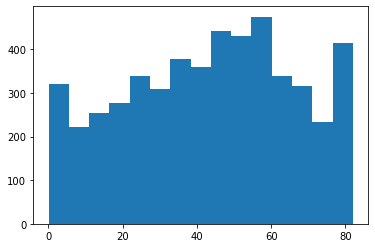

In [21]:
# Visualizing the age distribution
plt.hist(df['age'], bins = 15);

It can be seen that, majority of the people fall within the ages of 20 - 60 years.

This looks kinda interesting and sad.

We all knew stroke patients are always old but this viz is telling something different. 

Let's dive deep into it to explore more........

In [22]:
# Subsetting patients with 'yes' stroke status
df_yes = df[df['stroke'] == 1]
df_yes.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [23]:
# Looking at the shape of the dataframe
df_yes.shape

(249, 12)

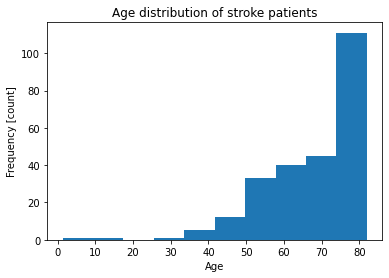

In [26]:
# Visualizing the age distribution of the stroke 'yes' patients
plt.hist(df_yes['age'])
plt.xlabel('Age')
plt.ylabel('Frequency [count]')
plt.title('Age distribution of stroke patients');

Ahaa!!! I knew it. It is clear that most of the stroke patients are older than 40 years and the majority in their
70s and 80s.

Now, let's look at the age distribution of the 'no' stroke patients.

In [27]:
# Subsetting the patients with 'no' stroke status
df_no = df[df['stroke'] == 0]
df_no.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
250,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
251,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
252,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
253,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0


In [29]:
# Looking at the shape of the dataframe
df_no.shape

(4861, 12)

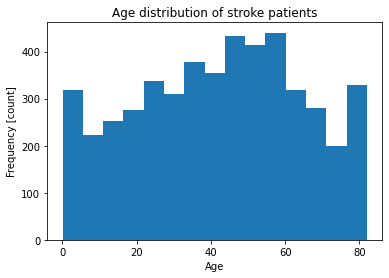

In [32]:
# Visualizing the age distribution of stroke 'no' patients
plt.hist(df_no['age'], bins = 15)
plt.xlabel('Age')
plt.ylabel('Frequency [count]')
plt.title('Age distribution of stroke patients');

It looks like majority of these folks are in the age brackets of 20 and 60 years

Finally, let's see if there is a relationship between age of a patient and the stroke status

In [37]:
correlation = df['age'].corr(df['stroke'])
correlation

0.2452573461709743

It can be seen that, there's no strong correlation between Age of a patient and the stroke status.

### Hypertension 


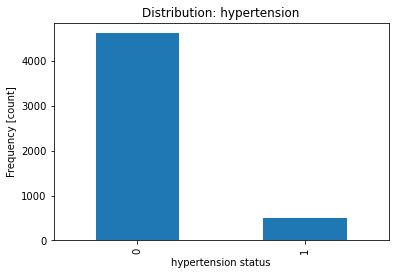

In [48]:
# Aggregating and visualizing the hypertension record
hypertension = df['hypertension'].value_counts().plot(kind = 'bar')
plt.xlabel('hypertension status')
plt.ylabel('Frequency [count]')
plt.title("Distribution: hypertension");

The hypertension records is imbalance. It can be seen that a greater proportion of the patients had no hypertension.

But let's look at those who had stroke too...

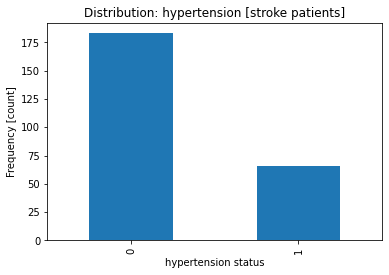

In [51]:
df_yes['hypertension'].value_counts().plot(kind = 'bar')
plt.xlabel('hypertension status')
plt.ylabel('Frequency [count]')
plt.title("Distribution: hypertension [stroke patients]");

Same thing with the stroke patients. Maybe finding the correlation can tell more...

In [52]:
df['hypertension'].corr(df['stroke'])

0.12790382346648

There is no strong effect of hypertension on stroke of patients. 

However, having hypertension increases your chance of getting stroke since the correlation is no zero and negative

### Let's look into residential status of the patients.
Maybe it has an effect...

In [54]:
# Distribution of residence of patients
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

The distribution is almost symmetrical and this is a good thing; the proportion is almost equal

### Average Glucose Level

Let's look at the relationship between average glucose level and stroke

In [56]:
# Calculating the correlation
df['avg_glucose_level'].corr(df['stroke'])

0.13194544082571

It seems like there's no strong relationship

### bmi [ body mass index]

In [58]:
# Calculating the correlation
df['bmi'].corr(df['stroke'])

0.042373661149233646

'bmi' also seems to have no great effect on stroke

### Smoking status

Let's look into smoking...

In [60]:
# Looking at the distribution
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

Majority of the patients never smoked but let's look into those who actually had stroke

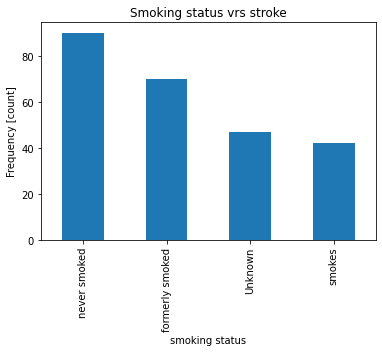

In [63]:
df_yes['smoking_status'].value_counts().plot(kind = 'bar')
plt.xlabel('smoking status')
plt.ylabel('Frequency [count]')
plt.title('Smoking status vrs stroke');

Interesting... It looks like smoking has an effect on stroke since most formerly smoked had stroke.


## Split
#### Splitting the data into feature matrix and target vector and training and test data

In [79]:
# Split the data into 'feature matrix' and 'target vector'
X = df.drop(columns = 'stroke')
target = 'stroke'
y = df[target]
print("X shape: ", X.shape)
print("y_shape: ", y.shape)

X shape:  (5110, 11)
y_shape:  (5110,)


In [80]:
# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4088, 11)
y_train shape: (4088,)
X_test shape: (1022, 11)
y_test shape: (1022,)


### Now let's build the model

The main ML workflow are as follows;
1. Baseline
2. Iterate
3. Evaluate 
4. Communicate results

# Baseline

In [85]:
# Calculating the baseline accuracy
acc_baseline = df['stroke'].value_counts(normalize = True).max()
print('The baseline accuracy is ', round(acc_baseline, 4))

The baseline accuracy is  0.9513


# Iterate

Building the model using Ensemble model 'Random Forest Classifier'

In [87]:
# Building a pipeline for the model
clf = make_pipeline(
    SimpleImputer(),
    RandomForestClassifier(random_state=42)
)
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


#### Using GridSearchCv to get the best hyperparameter for the model

In [88]:
# Creating a dictionary with range of hyperparameters for hyperparameter tunning
params = {
    "simpleimputer__strategy": ["mean", "median"],
    "randomforestclassifier__max_depth": range(10, 50, 10),
    "randomforestclassifier__n_estimators": range(25, 100, 25)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__max_depth': range(10, 50, 10),
 'randomforestclassifier__n_estimators': range(25, 100, 25)}

In [89]:
# Creating GridSearchCv to get the best hyperparameters for the model
model = GridSearchCV(
    clf,
    param_grid = params,
    cv = 5,
    n_jobs = -1, 
    verbose = 1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

#### Fitting the model with the training data

In [90]:
# Training the model
model.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\Utente\anaconda3\muta\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  warnings.warn(


ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'Male'